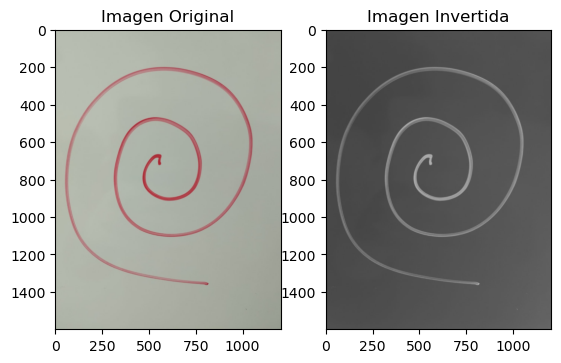

In [77]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen original
ruta_original = "esp6.jpeg"  # Añadir imagen nueva

# Leer la imagen original
imagen_original = cv2.imread(ruta_original)

# Verificar que la imagen se haya cargado correctamente
if imagen_original is not None:
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

    # Invertir colores en escala de grises
    imagen_invertida = cv2.bitwise_not(imagen_gris)

    # Nombre de la nueva imagen invertida
    nombre_nueva_imagen = "parkinson_negro_prueba.png"

    # Guardar la imagen invertida
    cv2.imwrite(nombre_nueva_imagen, imagen_invertida)

    # Mostrar la imagen original e invertida
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title("Imagen Original")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_invertida, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title("Imagen Invertida")

    plt.show()
else:
    print(f"Error: No se pudo cargar la imagen en: {ruta_original}")


In [78]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

# Cargar el modelo previamente entrenado
modelo_cargado = load_model('modeloCNN_spirals_87.h5')

# Ruta de la imagen que deseas predecir
img_path = nombre_nueva_imagen  # Asegúrate de proporcionar la ruta correcta

# Cargar la imagen y ajustar su tamaño
img = image.load_img(img_path, target_size=(100, 100))

# Convertir la imagen a un array de numpy
img_array = image.img_to_array(img)

# Expandir las dimensiones para que coincidan con las expectativas del modelo
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen
img_array = preprocess_input(img_array)

# Realizar la predicción
probabilidades = modelo_cargado.predict(img_array)

# Obtener la probabilidad de la clase "parkinson"
probabilidad_parkinson = probabilidades[0][0]

print(f"Probabilidad de Parkinson: {probabilidad_parkinson:.2f}")


1/1 [==============================] - 1s 510ms/step
Probabilidad de Parkinson: 0.05


In [28]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

# Cargar el modelo previamente entrenado
# modelo_cargado = load_model('modeloCNN_spirals_80_mal.h5')
modelo_cargado = load_model('modeloCNN_spirals_87.h5')

# modelo_cargado.summary()

# Ruta de la imagen que deseas predecir
img_path = nombre_nueva_imagen  # Asegúrate de proporcionar la ruta correcta

# Cargar la imagen y ajustar su tamaño
img = image.load_img(img_path, target_size=(100, 100))

# Convertir la imagen a un array de numpy
img_array = image.img_to_array(img)

# Expandir las dimensiones para que coincidan con las expectativas del modelo
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen
img_array = preprocess_input(img_array)

# Realizar la predicción
prediccion = modelo_cargado.predict(img_array)

print(prediccion)
# Obtener la clase predicha
clase_predicha = "healthy" if prediccion[0][0] < 0.5 else "parkinson"

print("Predicción: " + clase_predicha)


1/1 [==============================] - 0s 389ms/step
[[0.99999994]]
Predicción: parkinson
